# Countour detection
Source: https://docs.opencv.org/trunk/d4/d73/tutorial_py_contours_begin.html

In [1]:
# load dependencies
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# read image
img_src = '../img/raw/20200827_082725.jpg'
img_src_2 = '../arrow.jpg'

## Canny Edge Detection

imread parameters
    - https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/
    
source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html


(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

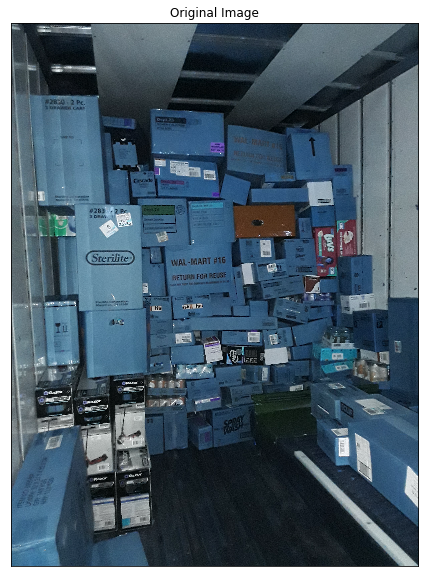

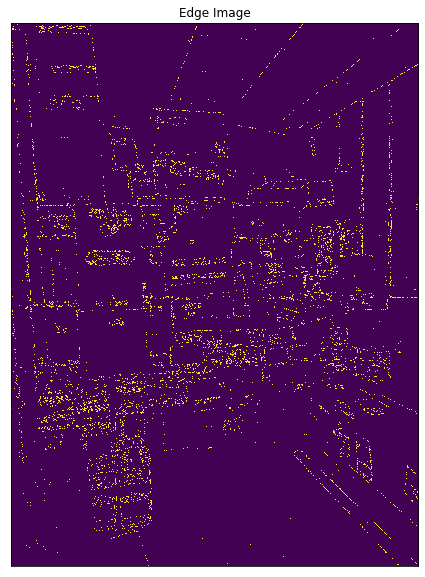

In [180]:
img = cv2.imread(img_src)
# img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# canny detection
edges = cv2.Canny(img, threshold1=100, threshold2=110)

# original image
plt.figure(figsize=[10,10])
plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# edge image
plt.figure(figsize=[10,10])
plt.imshow(edges)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

## Contour edge detection
source: https://www.geeksforgeeks.org/python-detect-polygons-in-an-image-using-opencv/

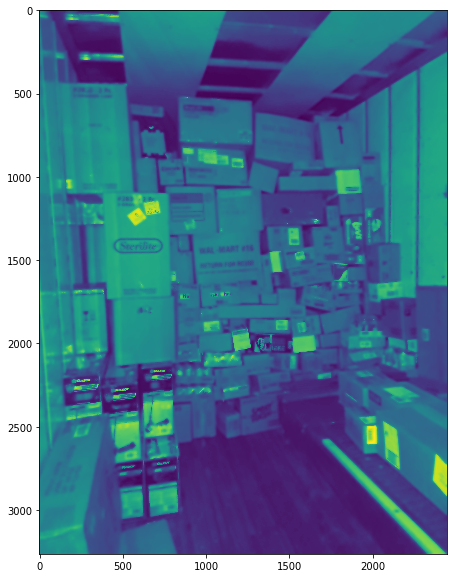

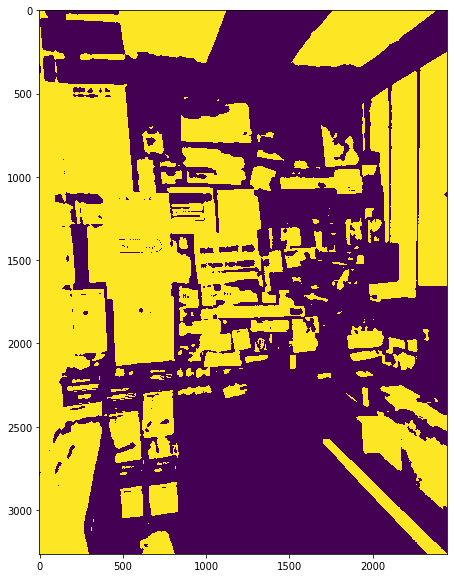

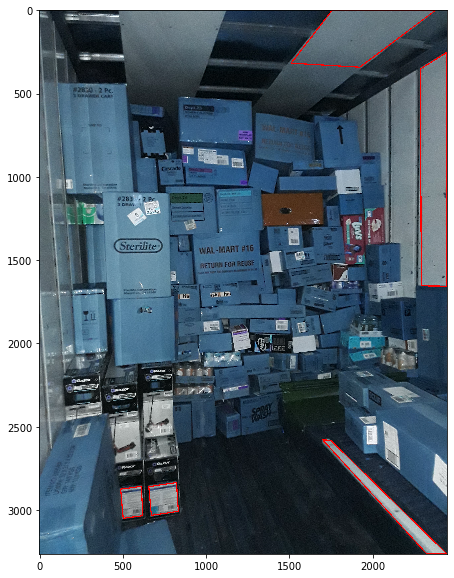

In [181]:
# Reading image 
img2 = cv2.imread(img_src, cv2.COLOR_BGR2GRAY) 
   
# Reading same image in another variable, converting to gray scale and apply blur. 
img = cv2.imread(img_src, cv2.IMREAD_GRAYSCALE)
blur = cv2.bilateralFilter(img, 25, 75, 75)

# Converting image to a binary image  
# (black and white only image). 
_, threshold = cv2.threshold(blur, 90, 110,  
                            cv2.THRESH_BINARY) 
   
# Detecting shapes in image by selecting region with same colors or intensity. 
contours, _ = cv2.findContours(
    threshold,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_NONE)[-2:]
   
# Searching through every region selected to find the required polygon. 
for cnt in contours : 
    area = cv2.contourArea(cnt)
    
    # Shortlisting the regions based on their area. 
    if (area > 400):  
        approx = cv2.approxPolyDP(
            cnt,  
            0.009 * cv2.arcLength(cnt, True), 
            True) 
   
        # Checking if the no. of sides of the selected region is 7. 
        if (len(approx) == 4):  
            cv2.drawContours(img2, [approx], 0, (255, 0, 0), 5) 
        
# Showing the image along with outlined arrow - matplotlib applies a heat map altering the original image
plt.figure(figsize=[10,10])
plt.imshow(blur)

plt.figure(figsize=[10,10])
plt.imshow(threshold)

plt.figure(figsize=[10,10])
plt.imshow(img2)

## Contour detection by split imaging
 - Split image into 4 sections
 - Analyze contours and areas of each image
 - Determine areas of each and sum the totals

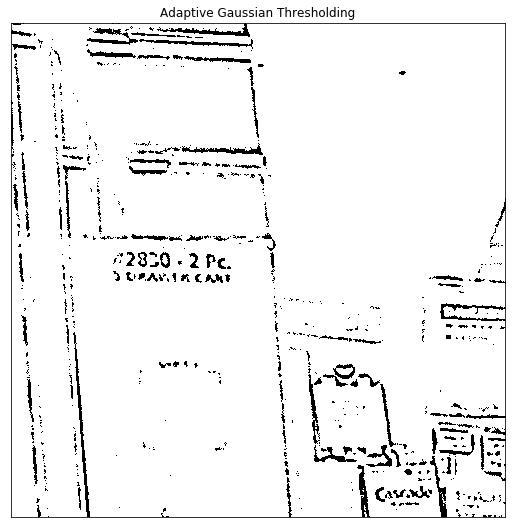

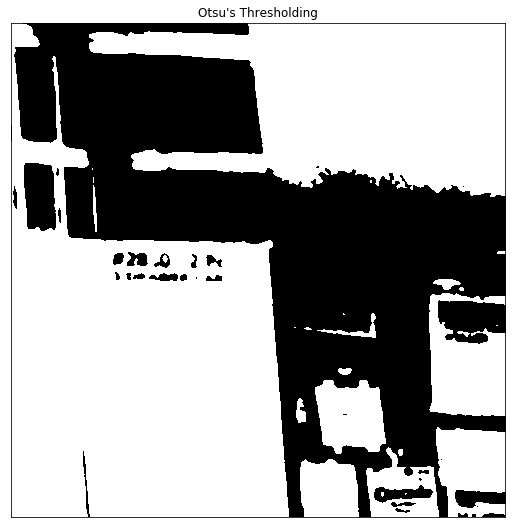

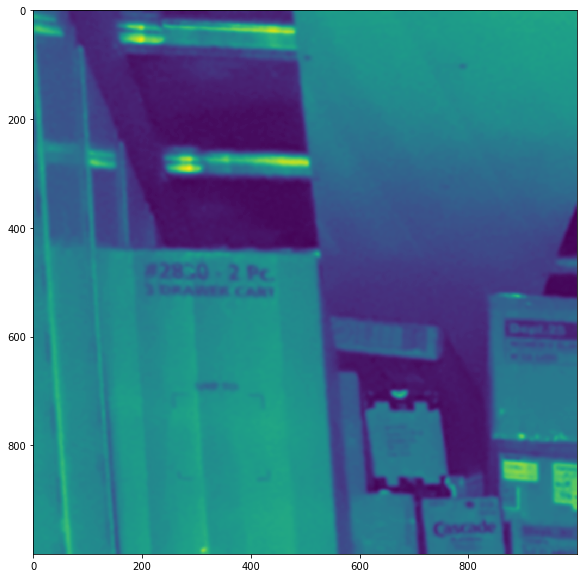

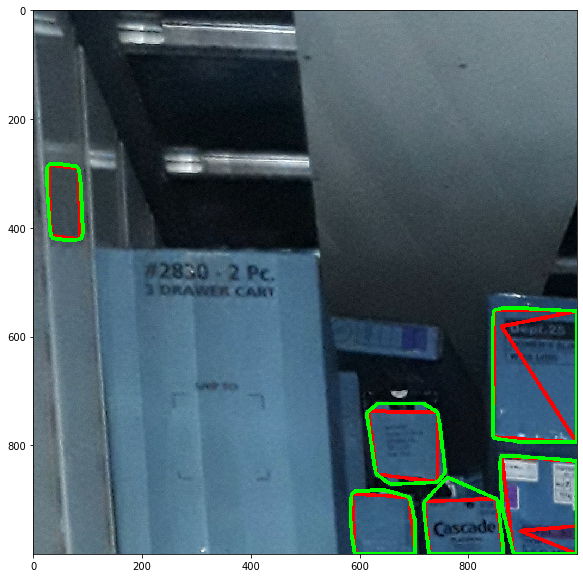

In [182]:
# Define pixel size of sub-image
sub_row = 1000
sub_col = 1000

# Reading image
img2 = cv2.imread(img_src, cv2.COLOR_BGR2GRAY)
img2 = img2[0:sub_row, 0:sub_col]

# Reading same image in another variable, converting to gray scale, spit image and apply blur.
img = cv2.imread(img_src)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img[0:sub_row, 0:sub_col]

blur = cv2.GaussianBlur(img, (17, 17), 0) # less computationally costly
# blur = cv2.bilateralFilter(img, 11, 75, 75)

# Converting image to a binary image (black and white only image). 

ret, th1 = cv2.threshold(blur,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
ret4,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

titles = [ 
#     'Global Thresholding (v = 127)',
#     'Adaptive Mean Thresholding', 
    'Adaptive Gaussian Thresholding',
    'Otsu\'s Thresholding'
]

images = [
#     th1, 
#     th2, 
    th3, 
    th4
]

for i in range(len(images)):
    plt.figure(figsize=[20,20])
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

threshold = th4

# Detecting shapes in image by selecting region with same colors or intensity. 
contours, _ = cv2.findContours(
    threshold,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_NONE)[-2:]

# Searching through every region selected to find the required polygon. 
for cnt in contours : 
    area = cv2.contourArea(cnt)

    # Shortlisting the regions based on their area. 
    if (area > 2000):
        approx = cv2.approxPolyDP(
            cnt,  
            0.08 * cv2.arcLength(cnt, True), 
            True)
        hull = cv2.convexHull(cnt)
        
        # Checking if the no. of sides of the selected region is 7. 
        if (len(approx) >= 4):  
            cv2.drawContours(img2, [approx], 0, (255, 0, 0), 5)
            cv2.drawContours(img2, [hull], 0, (0, 255, 0), 5)
#             cv2.drawContours(img2, [cnt], 0, (0, 0, 255), 5)
        
# Showing the image along with outlined arrow - matplotlib applies a heat map altering the original image
plt.figure(figsize=[10,10])
plt.imshow(blur)

plt.figure(figsize=[10,10])
plt.imshow(img2)

## K-Mean Clustering of Dominant Colors

Sources
    - https://stackoverflow.com/questions/28793985/find-dominant-color-on-an-image
    - https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html
    - https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71
    
Definition of load quality = area_of_like_brown/total area of image

Assumptions 
    - The wall is pre-dominantly brown
    - Load quality is measured by the ratio of all light brown-like colors to all other colors**
    
Improvement points;
    - Reduce fit time
    - Seek objects by color and calculate area
    - Fit a hull around them
    - Automatically snip image until it fits a distribution of light-brown-like colors of note
        - Sample 30 walls and use a hypthosis test to find the confidence inteval of brown-like colors to seek in new colors

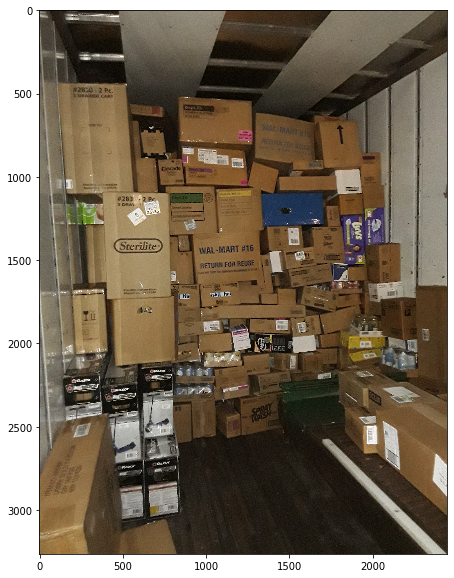

In [6]:
# function definitions
def visualize_colors(cluster, centroids):
    
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

# import library dependencies
from sklearn.cluster import KMeans
import cv2

# read image and display correctly
img = cv2.imread(img_src)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10,10])
plt.imshow(img)

In [199]:
# Load image and convert to a list of pixels
reshape = img.reshape((img.shape[0] * img.shape[1], 3))

# Find and display most dominant colors
cluster = KMeans(n_clusters=5).fit(reshape)
visualize = visualize_colors(cluster, cluster.cluster_centers_)
visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
cv2.imshow('visualize', visualize)
cv2.waitKey()

[188.37551064 183.59999511 172.23127937] 4.60%
[73.65580136 58.51842261 42.16433343] 21.30%
[145.47085067 131.15505466 105.56123751] 21.94%
[33.59205071 27.09655591 17.79551973] 24.79%
[119.4083143   93.51885399  61.52791115] 27.37%


-1

## Finding shades of Brown to detect boxes

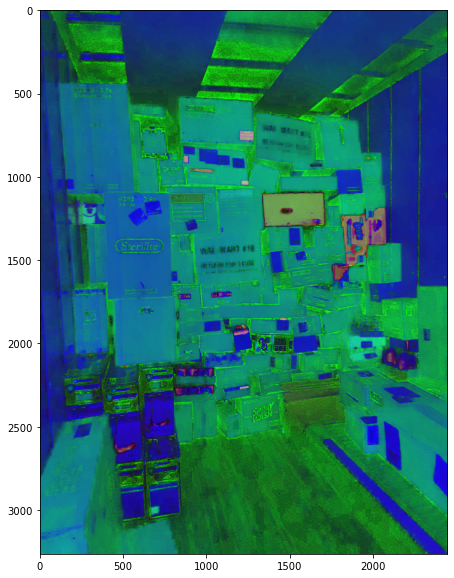

In [2]:
# setup color space
csv_rgb = cv2.COLOR_BGR2RGB
csv_hsv = cv2.COLOR_BGR2HSV
cols_rgb = ['red', 'green', 'blue']
cols_hsv = ['hue', 'sat', 'val']

# read image and display correctly
img = cv2.imread(img_src)
img = cv2.cvtColor(img, csv_hsv)

plt.figure(figsize=[10,10])
plt.imshow(img)

In [3]:
# setup cols
cols = cols_hsv

# Load image and convert to a list of pixels
reshape = img.reshape((img.shape[0] * img.shape[1], 3))
df_rgb = pd.DataFrame(data=reshape, columns=cols)
df_rgb = df_rgb[cols].melt()
df_rgb.head()

,variable,value
0,hue,29
1,hue,26
2,hue,26
3,hue,24
4,hue,22


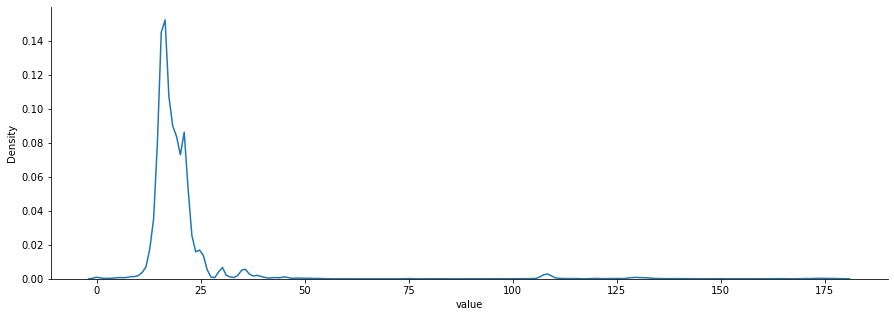

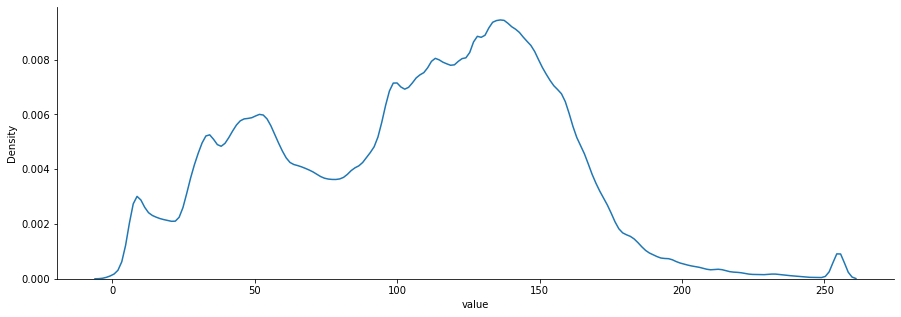

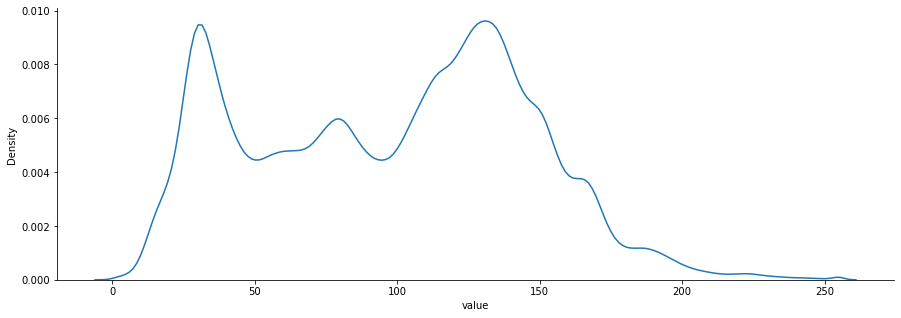

In [17]:
# view image histogram
for color in cols:
    plt.figure(figsize=[15,5])
    sns.kdeplot(
        data=df_rgb.loc[ df_rgb["variable"] == color, :], 
        x='value',
#         color=color
    )
    sns.despine()

In [6]:
# define window names
window_original = 'original'
window_mask = 'mask'

# rgb -  upper and lower bounds
lower_bound_rgb = np.array((25, 25, 25))
upper_bound_rgb = np.array((150, 140, 140))

# hue -  upper and lower bounds
lower_bound_hue = np.array((25, 25, 25))
upper_bound_hue = np.array((150, 140, 140))


In [7]:
max_value = 255
max_value_H = 360//2
low_H = 0
low_S = 0
low_V = 0
high_H = max_value_H
high_S = max_value
high_V = max_value
window_capture_name = 'Video Capture'
window_detection_name = 'Object Detection'
low_H_name = 'Low H'
low_S_name = 'Low S'
low_V_name = 'Low V'
high_H_name = 'High H'
high_S_name = 'High S'
high_V_name = 'High V'

def on_low_H_thresh_trackbar(val):
    global low_H
    global high_H
    low_H = val
    low_H = min(high_H-1, low_H)
    cv2.setTrackbarPos(low_H_name, window_detection_name, low_H)
    
def on_high_H_thresh_trackbar(val):
    global low_H
    global high_H
    high_H = val
    high_H = max(high_H, low_H+1)
    cv2.setTrackbarPos(high_H_name, window_detection_name, high_H)
    
def on_low_S_thresh_trackbar(val):
    global low_S
    global high_S
    low_S = val
    low_S = min(high_S-1, low_S)
    cv2.setTrackbarPos(low_S_name, window_detection_name, low_S)
    
def on_high_S_thresh_trackbar(val):
    global low_S
    global high_S
    high_S = val
    high_S = max(high_S, low_S+1)
    cv2.setTrackbarPos(high_S_name, window_detection_name, high_S)
    
def on_low_V_thresh_trackbar(val):
    global low_V
    global high_V
    low_V = val
    low_V = min(high_V-1, low_V)
    cv2.setTrackbarPos(low_V_name, window_detection_name, low_V)
    
def on_high_V_thresh_trackbar(val):
    global low_V
    global high_V
    high_V = val
    high_V = max(high_V, low_V+1)
    cv2.setTrackbarPos(high_V_name, window_detection_name, high_V)

In [1]:
cv2.namedWindow(window_original)
cv2.namedWindow(window_mask)

cv2.createTrackbar(low_H_name, window_mask , low_H, max_value_H, on_low_H_thresh_trackbar)
cv2.createTrackbar(high_H_name, window_mask , high_H, max_value_H, on_high_H_thresh_trackbar)
cv2.createTrackbar(low_S_name, window_mask , low_S, max_value, on_low_S_thresh_trackbar)
cv2.createTrackbar(high_S_name, window_mask , high_S, max_value, on_high_S_thresh_trackbar)
cv2.createTrackbar(low_V_name, window_mask , low_V, max_value, on_low_V_thresh_trackbar)
cv2.createTrackbar(high_V_name, window_mask , high_V, max_value, on_high_V_thresh_trackbar)

while True:
    
    key = cv2.waitKey(30)
    if key == ord('q') or key == 27:
        cv2.destroyAllWindows()
        break
    else:
        frame_HSV = img
        frame_threshold = cv2.inRange(frame_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
        img_comnb = cv2.bitwise_and(img, img, mask = frame_threshold)

        frame_1 = cv2.imshow(window_original, cv2.resize(frame_HSV, (0,0), fx=1, fy=0.3))
        frame_2 = cv2.imshow(
            window_mask, 
            cv2.cvtColor(cv2.resize(img_comnb, (0,0), fx=1, fy=0.3), cv2.COLOR_HSV2RGB)
        )

NameError: name 'cv2' is not defined

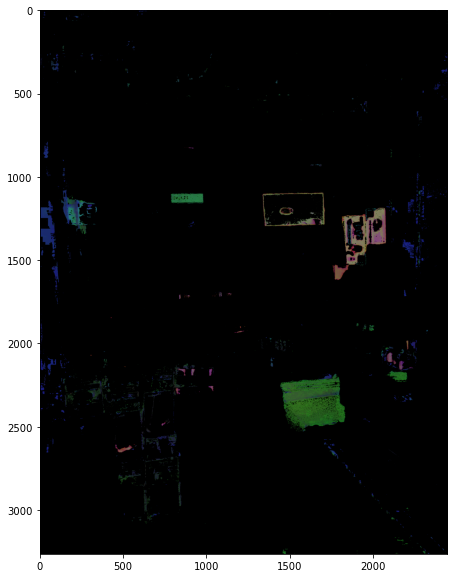

In [10]:
# create mask and observe capture
mask = cv2.inRange(img, lower_bound, upper_bound)

# display original and mask
img_comnb = cv2.bitwise_and(img, img,mask = mask)
plt.figure(figsize=[10,10])
plt.imshow(img_comnb)